In [1]:
import sys
!{sys.executable} -m pip install --upgrade statsmodels

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 3.1 MB/s eta 0:00:00m eta 0:00:010:00:01
  Using cached patsy-0.5.3-py2.py3-none-any.whl (233 kB)


In [2]:
# -*- coding: utf-8 -*-
"""
Created on Sun Apr  4 15:30:52 2021

@author: pmarc
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import statsmodels.api as stm


In [4]:


donnee = pd.read_csv('../Fichiers/PersonnesActivesv0r2.csv')
stats=donnee.describe()
dimensions=donnee.shape
nomsvariables = pd.DataFrame(donnee.columns)



Text(0.5, 0, 'Grandeur (cm)')

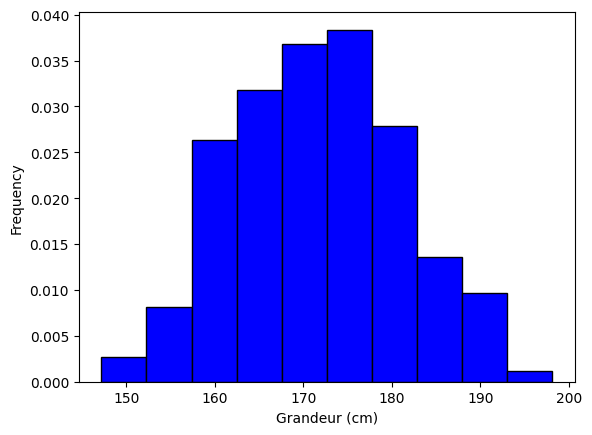

In [7]:


ax=donnee["Grandeur (cm)"].plot.hist(density=True, bins = 10, color = 'blue', edgecolor = 'black')
ax.set_xlabel("Grandeur (cm)")


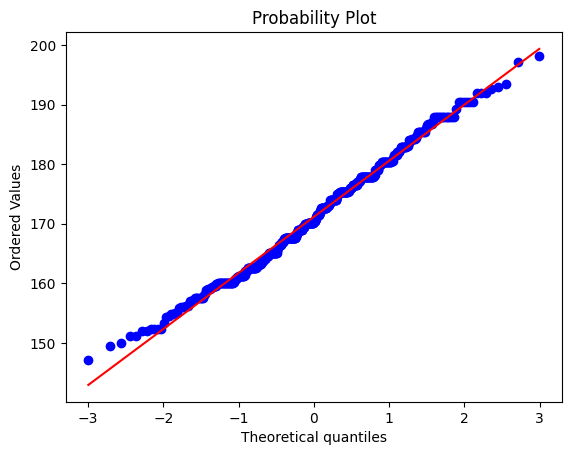

In [8]:


sts.probplot(donnee["Grandeur (cm)"].values, dist=sts.norm, plot=plt.figure().add_subplot(111))


d=1000
grille_x = np.linspace(donnee["Grandeur (cm)"].min(), donnee["Grandeur (cm)"].max(), d)
dx=(donnee["Grandeur (cm)"].max()-(donnee["Grandeur (cm)"].min()))/(d-1)


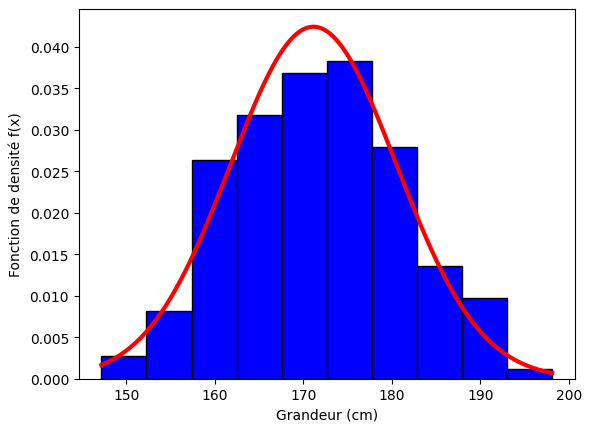

In [10]:

mu, sigma = sts.norm.fit(donnee["Grandeur (cm)"].values)
pdf = sts.norm.pdf(grille_x, mu, sigma)
ax=donnee["Grandeur (cm)"].plot.hist(density=True, bins = 10, color = 'blue', edgecolor = 'black')
ax.set_xlabel("Grandeur (cm)")
ax.plot(grille_x, pdf, linewidth=3, color = 'red')
ax.set_ylabel("Fonction de densité f(x)")


Fit_normal = sts.kstest(donnee["Grandeur (cm)"],'norm',[mu, sigma])


0.17300456031912836
0.042445078230286204


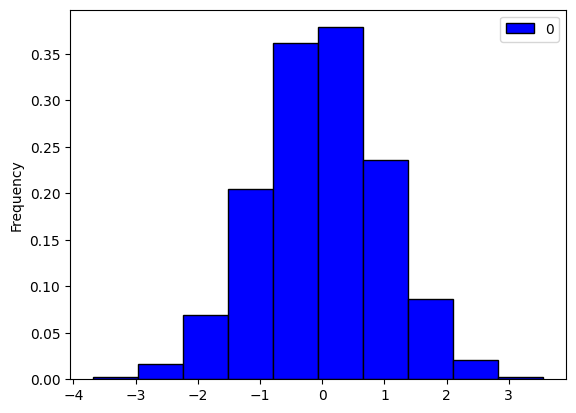

In [11]:


A=np.random.normal(0,1,10000)
ax=pd.DataFrame(A).plot.hist(density=True, bins = 10, color = 'blue', edgecolor = 'black')


In [12]:
Fit_normal2 = sts.kstest(A,'norm')


Z_scores=sts.zscore(donnee[["Âge","Poids (kg)","Grandeur (cm)"]].values,axis=0)

### probabilidade q a pessoa tenha mais de 180 p/ o mu e sigma calculados
print(1-sts.norm(mu, sigma).cdf(180))

### probabilidade de medir 171
print(sts.norm(mu, sigma).pdf(171))




0.17300456031912836
0.042445078230286204
